In [1]:
import numpy as np
# import sympy as sp
from scipy.integrate import solve_ivp                   ## Package Required to solve an initial value Differential Equation
from matplotlib import pyplot as plt                    ## Plotting Package                               
from matplotlib.colors import LinearSegmentedColormap   ## For Customized Color Plots
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl 
mpl.rcParams.update({"text.usetex":True})               ## LaTex Formatting Package in Matplotlib
from IPython import display
display.Image("URL-to-image")

np.set_printoptions(precision=5, suppress=True, linewidth=100)
plt.rcParams['figure.dpi'] = 100                        ## dpi => dots per inches of a figure! (higher dpi implies higher resolution)

$$ \textbf{\Large{[On the Understanding of Van der Pol Oscillator]}}$$

$$\textbf{\large{Nilanjan Sasmal}}$$
$$\textbf{School of Physical Sciences,}$$
$$\textbf{Indian Association for the Cultivation of Science (IACS), Kolkata, India}$$
$$\textbf{April 07, 2025}$$
$$ \textbf{\textcolor{teal}{----------------------------------------------------------------------------------------------------------------------------------------------------------------------}} $$
$$ \textbf{\textcolor{cyan}{----------------------------------------------------------------------------------------------------------------------------------------------------------------------}} $$

## Van der Pol Oscillator!
$$ \Large{ \ddot{x}  - \epsilon (1-x^2) \dot{x} + x = 0 \ \ \ ; \ \  \text{with } \epsilon >0 }$$
$\large{\text{A standard recipe is to rewrite the $2^{nd}-$order ODE as a system of two $1^{st}$–order ODEs} :}$
$$\large{y = \dot{x} \ \ \& \ \ \dot{y} = \textcolor{cyan}{-x} + \textcolor{red}{\epsilon(1-x^2)y} } $$

$\large{\text{This system clearly shows two competing effects: a \textcolor{cyan}{“linear” restoring force} and \textcolor{red}{a nonlinear damping/amplification term}}} $ 

$\large{ \text{For } |x|>1 \text{ we have a damping effect, and for } |x|<1 \text{ we have an amplification effect.}}$
$\large{\text{As a result of which large-amplitude oscillations decays, but in turn, it pumps back the oscillations if they become too small.}}$

### Large $\epsilon$ limit ($\epsilon \gg 1$) of the VdP Oscillator!

We have the VdP Equation: $\displaystyle \ddot{x}  - \epsilon (1-x^2) \dot{x}  = -x \ \ \ \ \text{except, now we want to look at when } \epsilon \gg 1  $

$$ \text{LHS : } \ \ \  \ddot{x}  - \epsilon (1-x^2) \dot{x} =  \frac{d}{dt} \bigg( \underbrace{\dot{x} + \epsilon \bigg[\underbrace{\frac{x^3}{3}-x}_{\displaystyle F(x)}\bigg]}_{\displaystyle W(x,\dot{x})}  \bigg) $$

Therefore the Van der Pol Equation now implies,
$$ \dot{W}(x,\dot{x}) = \ddot{x} -\epsilon(1-x^2)\dot{x} = -x $$

After doing a variable change: $\displaystyle y = \frac{W}{\epsilon}$, we get the new modified Van der Pol Equation as,
$$ \dot{x} = \epsilon [y-\frac{x^3}{3}+x] \ \ \ \& \ \ \ \dot{y} = -\frac{1}{\epsilon} x \ \ \ \ \text{ for } \epsilon \gg 1  \ \ \ \ \ \ -------- \ \ (\#) $$

<img src="largeps1.png" alt="My Image" width="500"/>  $F(x)=\displaystyle \frac{x^3}{3}-x$ $ \ \ \ \ \textcolor{gray}{[\text{Strogatz} \ (2015)]} $

Suppose that the initial condition is not too close to the $\text{\textcolor{cyan}{cubic nullcline (a curve where one of the derivatives in the system is zero)}}$, *i.e.,* suppose $y-F(x) \sim \mathcal{O}(1)$. Then Equation $(\#)$ implies $|\dot{x}| \sim \mathcal{O}(\epsilon) \gg 1$ ; whereas $|\dot{y}| \sim \mathcal{O}(\epsilon^{-1}) \ll 1$

<img src="largeps2.png" alt="My Image" width="600"/> $\epsilon_o = 10$ and $(x_o,y_o)=(2,0) \ \ \ \ $ $\textcolor{gray}{[\text{Strogatz} \ (2015)]} $

This analysis shows that the limit cycle has **two widely separated time scales**: the crawls require $\displaystyle \Delta t \sim \mathcal{O}(\epsilon)$ and the jumps require $\displaystyle \Delta t \sim \mathcal{O}(\epsilon^{-1})$

<img src="VdP-flow-large-e.gif" alt="My Image" width="500"/>  $ \ \ \ \ \textcolor{gray}{[\text{Takashi Kanamaru (Scholarpedia)} \ (2007)]} $

In [5]:
##########################################################################################################################
################################## Liénard's transformation of the Van der Pol Oscillator! ###############################
##########################################################################################################################
def VdP_large_eps(t, z, epsilon):
    """
    Liénard's transformation of VdP into two first-order ODEs:
        x' = ɛ(y - x^3/3 + x)     ## Nonlinear First-order ODE
        y' = -x/ɛ                    ## Linear First-order ODE
    In the limit ɛ >> 1 (large epsilon limit)
    """
    x, y = z
    dx_dt = epsilon * (y - ((x**3) / 3.0) + x)          ## dx/dt = ɛ(y - x^3/3 + x)
    dy_dt = (-1/epsilon) * x                            ## dy/dt = -x/ɛ
    return [dx_dt, dy_dt]                               ## Return the final output of the function VandPol (i.e., dx/dt and dy/dt)
    
def Phi(x):
    return x**3/3.0 - x

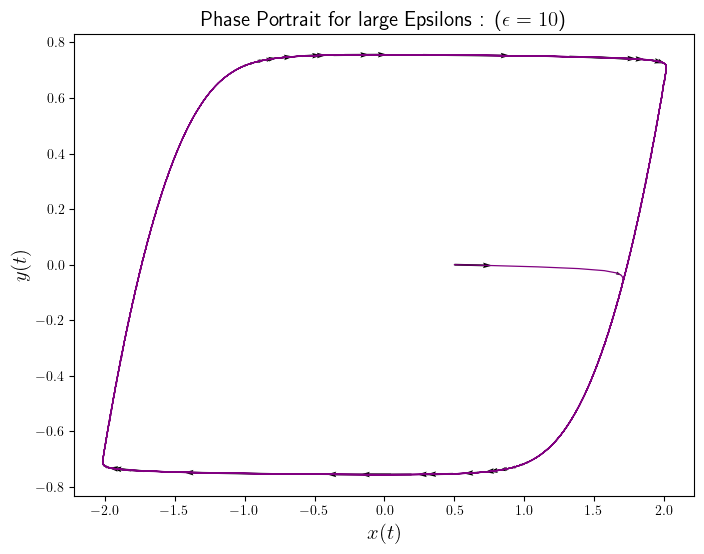

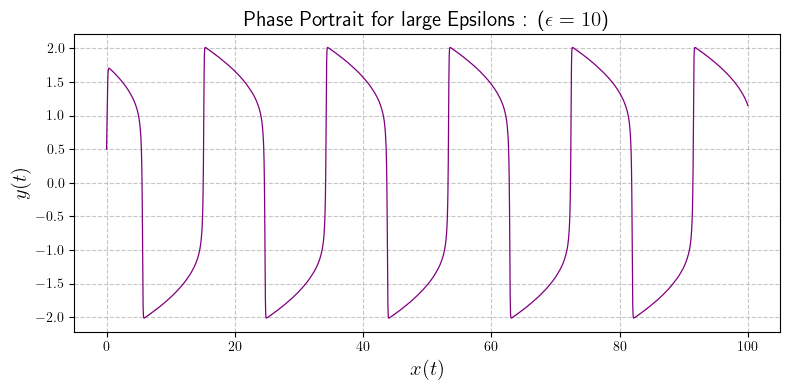

In [6]:
################# Parameters! ###############
large_eps = 10
large_eps_t_span = (0, 100)
large_eps_t_eval = np.linspace(large_eps_t_span[0], large_eps_t_span[1], 2000)
large_eps_init = [0.5, 0]

x_phi = np.linspace(-2.5, 2.5, 5000)
phi_x = Phi(x_phi)

large_eps_sol = solve_ivp(VdP_large_eps, large_eps_t_span, large_eps_init, method = 'RK45', args=(large_eps,), t_eval=large_eps_t_eval)
x, y = large_eps_sol.y[0], large_eps_sol.y[1]
    
############# Plot the continuous trajectory
plt.figure(figsize=(8, 6))
plt.plot(x, y, linewidth=0.9, color = 'purple', label='$x(t)$')
# plt.plot(x_phi, phi_x, label=r'$\phi(x)=\frac{1}{3}x^3-x$')
# plt.plot(large_eps_sol.t, large_eps_sol.y[0], linewidth=0.9, color = 'purple', label='$x(t)$')
########### Compute differences between consecutive points to get the local direction
dx = np.diff(x)
dy = np.diff(y)

################# Select a subset of points to overlay arrows to avoid clutter
indices = np.arange(0, len(x)-1, 5)
plt.quiver(x[indices], y[indices], dx[indices], dy[indices],
           scale_units='xy', angles='xy', scale=1,
           color='k', width=0.003)
############################################
plt.title(f"Phase Portrait for large Epsilons : ($\epsilon={large_eps}$)", fontsize = 15)
plt.xlabel('$x(t)$', fontsize = 15)
plt.ylabel('$y(t)$', fontsize = 15)
# plt.xlim(-1.5, 0.75)
# plt.ylim(-1.25, 1.15)
# plt.xticks(np.arange(0, 110, 10))
# plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.legend(framealpha=0.3, fontsize = 15)
plt.figure(figsize=(8, 4))
plt.plot(large_eps_sol.t, large_eps_sol.y[0], linewidth=0.9, color = 'purple', label='$x(t)$')
plt.title(f"Phase Portrait for large Epsilons : ($\epsilon={large_eps}$)", fontsize = 15)
plt.xlabel('$x(t)$', fontsize = 15)
plt.ylabel('$y(t)$', fontsize = 15)

plt.grid(True, linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

## Limit Cycle
A $\textcolor{cyan}{\text{Limit Cycle}}$ is an isolated closed trajectory. Isolated means that $\text{\textcolor{magenta}{neighboring trajectories are not closed}}$ 

<img src="limitcycle1.png" alt="My Image" width="900"/> $ \ \ \ \ \textcolor{gray}{[\text{Strogatz} \ (2015)]} $

Some other properties of $\textcolor{cyan}{\text{Limit Cycle}}$ :
1. $\textcolor{cyan}{\text{Limit Cycles}}$ only occur in non-linear systems
2. Any periodic orbit doesn't imply a limit cycle, but the vice-versa is true.

   (2.1) Although linear systems ($\dot{x} = Ax$) can have closed orbits, they aren't isolated. If $x(t)$ is a periodic solution, so is $cx(t)$ where $c \neq 0$ is a constant.
   
   (2.2) Even if the system is nonlinear and has periodic orbits, it $\text{\textcolor{red}{can still be} the case that it is \textcolor{red}{not a Limit Cycle}}$, if the periodic orbits are not isolated *i.e.,* we have a family of periodic orbits; for, eg: $ \ \ \dot{x}=y-y^3$ $\&$ $\dot{y}=-x-y^2$, this system has 3 fixed points $\{(\textcolor{red}{-1,-1}), (\textcolor{red}{-1,1}),(\textcolor{red}{0,0})\}$

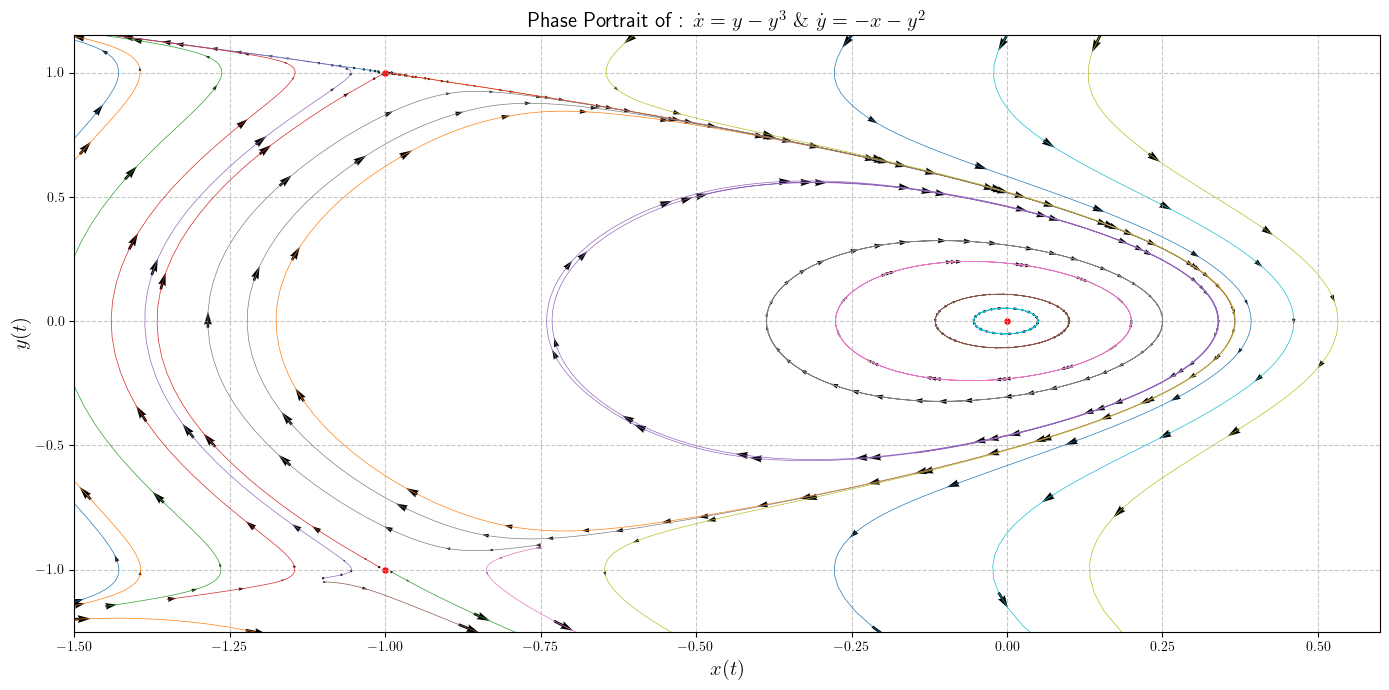

In [8]:
def system(t, state):
    x, y = state
    dxdt = y - y**3
    dydt = -x - y**2
    return [dxdt, dydt]

############## Time span and evaluation points
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 400)

############ Define a set of initial conditions to explore the phase plane
initial_conditions = [[-1.01,1],[-0.99, 1], [-0.99, -1.01], [-1.01,-0.99], [-1.1,-1.035], [-1.1, -1.05], [-0.75, -0.91], [-0.75, -0.9], [-0.6, 1.15],
    [0.05, 0.0], [-1.5, -1.13], [-1.5, -1.145], [-1.45, -1.148], [-1.35,-1.12], [-0.5, 0.5],
    [0.1, 0], [0.2, 0], [0.25, 0.0], [0.15, 1.15], [0.0, 1.15], [-0.25, 1.15], [-1.5, -1.2]
]
fp = np.array([[-1, -1], [-1, 1], [0, 0]])

plt.figure(figsize=(14, 7))

for ic in initial_conditions:
    sol = solve_ivp(system, t_span, ic, t_eval=t_eval)
    x, y = sol.y[0], sol.y[1]
    
    # Plot the continuous trajectory
    plt.plot(x, y, linewidth=0.5)
    
    # Compute differences between consecutive points to get the local direction
    dx = np.diff(x)
    dy = np.diff(y)
    
    # Select a subset of points to overlay arrows to avoid clutter
    indices = np.arange(0, len(x)-1, 10)
    plt.quiver(x[indices], y[indices], dx[indices], dy[indices],
               scale_units='xy', angles='xy', scale=1,
               color='k', width=0.002)

plt.scatter(fp[:,0], fp[:,1], color = 'red', s = 13)
plt.xlabel("$x(t)$", fontsize = 15)
plt.ylabel("$y(t)$", fontsize = 15)
plt.title("Phase Portrait of : $\dot{x}=y-y^3$ $\&$ $\dot{y}=-x-y^2$", fontsize = 15)
plt.xlim(-1.5, 0.6)
plt.ylim(-1.25, 1.15)
# plt.legend(loc="best")
plt.grid(True, linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

As we can see there are uncountable infinite number of periodic orbits that are possible in the phase spcae for the above pair of differential equations! Hence, these are not classified as Limit Cycles

### Fixed Point and Stability Analysis!

Writing the Van der Pol Equation in a Matrix form and equating them to $0$,:
$$ \begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} = \begin{bmatrix} y \\ -x + \epsilon(1-x^2)y \end{bmatrix}= \begin{bmatrix} f_1(x,y) \\ f_2(x,y) \end{bmatrix} =  \begin{bmatrix} 0 \\ 0 \end{bmatrix}  $$
We get a fixed point of the above-mentioned system of equations to be $(x^*,y^*)\equiv(0,0)$. Therefore the corresponding Jacobian system is,
$$  \begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} =  \underbrace{\begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \end{bmatrix}}_{\displaystyle J} \begin{bmatrix} {x} \\ {y} \end{bmatrix}  = \begin{bmatrix} 0 & 1 \\ -1 & \epsilon \end{bmatrix} \begin{bmatrix} {x} \\ {y} \end{bmatrix} \ \ \xrightarrow{\text{Charecteristic Polynomial}} \ \ \lambda^2 -\lambda \epsilon + 1 = 0 \implies \lambda_{\pm} = \frac{\epsilon}{2} \pm 
\frac{\sqrt{\epsilon^2-4}}{2}$$
Now, $\text{\textcolor{gold}{the Jacobian $J$ has a determinant $\Delta = 1 >0$ and has a trace tr$(J)=\epsilon>0$}}$. This implies that the Van der Pol Oscillator System will have an unstable fixed point at $(x^*,y^*)\equiv(0,0)$ for every $\epsilon>0$. Hence always have a Stable Limit Cycle for (any) each value of $\epsilon>0$.

## Liénard Systems

$\large{\text{For the following kind of second-order differential Equations : } \ddot{x} +f(x) \dot{x} + g(x) =0 \  }$

$$ \dot{x} = y \ \ \ \& \ \ \ \dot{y} = -g(x) - f(x) y \ \ \ \ \ \ \ \ \ \ ------------ \ \ \ (*) $$

$\text{ If } f(x) \ \& \ g(x) \text{ satisfies, }$
1. $f(x)$ and $g(x)$ are continuously differentiable for all $x$,
2. $f(x)$ is an even and $g(x)$ is a odd function,
3. $g(x)>0$ for $x>0$,
4. The odd function $\displaystyle F(x) = \int_0^x f(u) du $ has exactly one positive zero at $x = a$, is negative for $0<x<a$ is positive and non decreasing for $x >a$, and $F ( x )\to \infty$ as $x \to \infty$

Then, the system $(*)$ has a unique, stable limit cycle surrounding the origin in the
phase plane

## Numerical Results
### Van der Pol Oscillator!

**Differential Equation :** $$ \ddot x  - \epsilon (1-x^2) \dot x + x = 0 \ \ \ ; \ \  \text{with } \epsilon >0 $$

$$ y = \dot{x} \ \ \& \ \ \dot{y} = \epsilon (1-x^2)y-x \ \ \ ; \ \  \text{with } \epsilon >0 $$

`scipy.integrate.solve_ivp`  (**SciPy Method** to Solve an **initial value problem** for a system of ODEs)

This Function (`solve_ivp`) numerically integrates a system of ordinary differential equations given an initial value:
$$ \frac{dy}{dt} = F(t, y) \ \ ; \ \ \text{ with inital value } \ \ y(t_o) = y_o $$

`solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)`

In [13]:
##########################################################################################################################
########### Function Definition for the Differential Equation of the Van der Pol Oscillator! #############################
##########################################################################################################################
def VandPol(t, z, epsilon):
    """
    Van der Pol Oscillator is a Second-order (Nonlinear) ODE:
        x'' - ɛ(1 - x^2)x' + x = 0.
    Simplifying the second-order ODE to two first-order ODEs:
        y   = x'                 ## Linear First-order ODE
        y'  = ɛ(1 - x^2)y - x    ## Nonlinear First-order ODE
    If ɛ = 0, it becomes an equation for SHM with ω = 1 
    (This should serve as a nice point to check the numerics)
    """
    x, y = z
    dx_dt = y                                   ## dx/dt = y
    dy_dt = epsilon*(1 - x**2)*y - x            ## dy/dt = ɛ(1-x^2)y-x
    return [dx_dt, dy_dt]                       ## Return the final output of the function VandPol (i.e., dx/dt and dy/dt)

In [85]:
##########################################################################################################################
###################################################### Parameters ########################################################
##########################################################################################################################

epsilon = 0.1                                                                                ############### epsilon value
t_span = (0.0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 8000)

###########################################################################################################################
################################### Initial conditions (try a few different ones) #########################################
###########################################################################################################################

Initial_Conditions = [[0.5, 1], [0.5,0.5], [0.5, 0.0], [0.5, -1],  [0.5, -2], [0.5, -2.5]]
initial_conditions = [0.5, 0.0]
EPSILON = [0, 0.05, 0.1, 0.2, 0.5, 1.0]

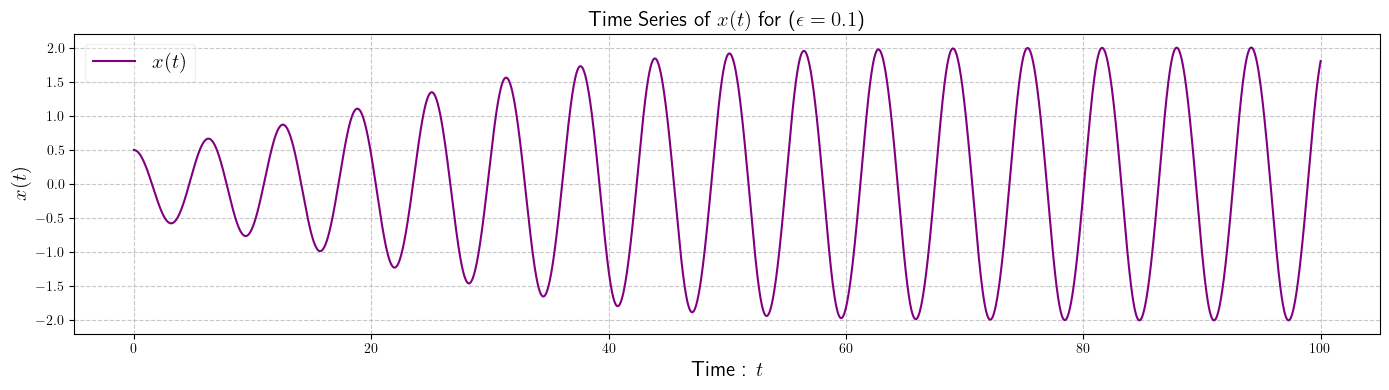

In [87]:
###########################################################################################################################
############################################### DIFFERENT Time Series PLOTS! ##############################################
###########################################################################################################################

############## Further Computations! #################   Sol.y[0] = x(t) ; Sol.y[1] = x'(t) = y(t) ; Sol.t = t  ###########
######################################################   y_dot_vals = x''(t) = y'(t)   ####################################
###########################################################################################################################
epsilon = 0.1
################ Solving the Differential Equation #######################
Sol = solve_ivp(VandPol, t_span, initial_conditions, method = 'RK45', args=(epsilon,), t_eval=t_eval) 

##############################  Compute second derivative/acceleration [x''(t) or, y'(t)]  ################################
y_dot_vals = epsilon * (1 - Sol.y[0]**2) * Sol.y[1] - Sol.y[0]

###########################################################################################################################
####################################################### PLOT 1: Time Series ###############################################
###########################################################################################################################

plt.figure(figsize=(14, 4))
plt.plot(Sol.t, Sol.y[0], color = 'purple', label='$x(t)$')                                    #### Time Series : x(t) vs t
# plt.plot(Sol.t, Sol.y[1], color = 'green', label='$\dot{x}(t)$'                            #### Time Series :  x'(t) vs t
# plt.plot(Sol.t, y_dot_vals, color = 'blue', label='$\ddot{x}(t)$')                        #### Time Series :  x''(t) vs t
plt.title(f"Time Series of $x(t)$  for ($\epsilon={epsilon}$)", fontsize = 15)
plt.xlabel('Time : $t$', fontsize = 15)
plt.ylabel('$x(t)$', fontsize = 15)
# plt.xticks(np.arange(0, 110, 10))
# plt.yticks(np.arange(-2, 2.5, 0.5))
plt.legend(framealpha=0.3, fontsize = 15)
plt.grid(True, linestyle = "--", alpha = 0.7)

###########################################################################################################################
####################################################### PLOT 2: Time Series ###############################################
###########################################################################################################################

# plt.figure(figsize=(14, 4))
# plt.plot(Sol.t, y_dot_vals, color = 'purple', label='$\ddot{x}(t)$')                         #### Time Series : x''(t) vs t
# # plt.plot(Sol.t, Sol.y[1], color = 'green', label='$\dot{x}(t)$')
# plt.title(f"Time Series of $a(t)$  for ($\epsilon={epsilon}$)", fontsize = 15)
# plt.xlabel('Time : $t$', fontsize = 15)
# plt.ylabel('$\ddot{x}(t)$', fontsize = 15)
# # plt.xticks(np.arange(0, 110, 10))
# # plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.legend(framealpha=0.3, fontsize = 15)
# plt.grid(True, linestyle = "--", alpha = 0.7)

plt.tight_layout()
plt.show()

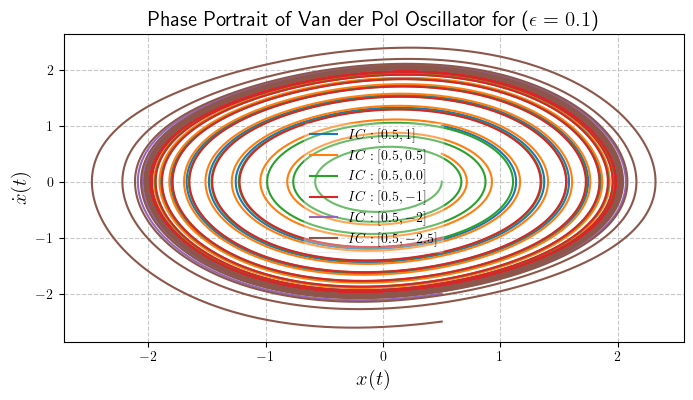

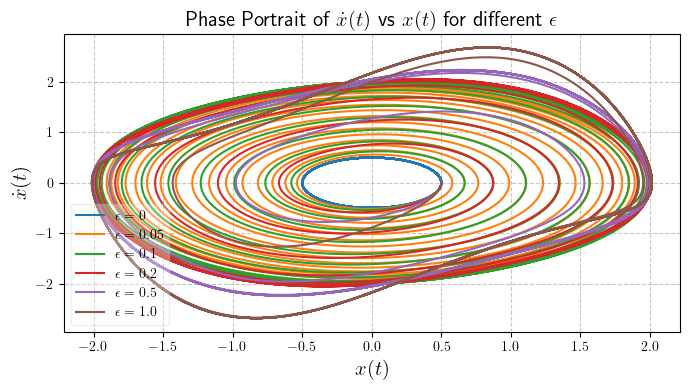

In [89]:
###########################################################################################################################
################################## PLOT 1. Phase Portrait for Different Initial Conditions ################################
###########################################################################################################################

plt.figure(figsize=(8, 4))
for y0 in Initial_Conditions:
    sol = solve_ivp(VandPol, t_span, y0, method = 'RK45', args=(epsilon,), t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'$IC: {y0}$')
plt.title(f"Phase Portrait of Van der Pol Oscillator for ($\epsilon={epsilon}$)", fontsize = 15)
plt.xlabel('$x(t)$',fontsize = 15)
plt.ylabel('$\dot{x}(t)$', fontsize = 15)
# plt.yticks(np.arange(-4, 3, 0.5))
# plt.xticks(np.arange(-2.5, 3, 0.5))
plt.legend(framealpha=0.3, fontsize = 10)
plt.grid(True, linestyle = "--", alpha = 0.7)

###########################################################################################################################
######################################## PLOT 2. Phase Portrait for Different Values of ɛ #################################
###########################################################################################################################

plt.figure(figsize=(7, 4))
for ep in EPSILON:
    sol = solve_ivp(VandPol, t_span, initial_conditions, method = 'RK45', args=(ep,), t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'$\epsilon = {ep}$')
plt.title(r"Phase Portrait of $\dot{x}(t)$ vs $x(t)$ for different $\epsilon$", fontsize = 15)
plt.xlabel('$x(t)$',fontsize = 15)
plt.ylabel('$\dot{x}(t)$', fontsize = 15)
# plt.yticks(np.arange(-4, 3, 0.5))
# plt.xticks(np.arange(-2.5, 3, 0.5))
plt.legend(framealpha=0.3, fontsize = 10)
plt.grid(True, linestyle = "--", alpha = 0.7)

###########################################################################################################################
######################################## PLOT 3. Phase Portrait for Different Values of ɛ #################################
###########################################################################################################################

# plt.figure(figsize=(8, 5))
# for ep in EPSILON:
#     Sol = solve_ivp(VandPol, t_span, initial_conditions, method = 'RK45', args=(ep,), t_eval=t_eval) ### Solving the Differential Equation
#     y_dot_vals = epsilon * (1 - Sol.y[0]**2) * Sol.y[1] - Sol.y[0]
#     plt.plot(Sol.y[1], y_dot_vals, label=f'$\epsilon = {ep}$')
# # plt.plot(Sol.t, Sol.y[1], color = 'green', label='$\dot{x}(t)$')
# plt.title(r"Phase Portrait of $\dot{y}(t)$ vs $y(t)$", fontsize = 15)
# plt.xlabel('$y(t)$', fontsize = 15)
# plt.ylabel('$\dot{y}(t)$', fontsize = 15)
# # plt.xticks(np.arange(0, 110, 10))
# # plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.legend(framealpha=0.3, fontsize = 15)
# plt.grid(True, linestyle = "--", alpha = 0.7)

###########################################################################################################################
######################################## PLOT 4. Phase Portrait for Different Values of ɛ #################################
###########################################################################################################################

# plt.figure(figsize=(8, 5))
# for ep in EPSILON:
#     Sol = solve_ivp(VandPol, t_span, initial_conditions, method = 'RK45', args=(ep,), t_eval=t_eval) ### Solving the Differential Equation
#     y_dot_vals = epsilon * (1 - Sol.y[0]**2) * Sol.y[1] - Sol.y[0]
#     plt.plot(Sol.y[0], y_dot_vals, label=f'$\epsilon = {ep}$')
# # plt.plot(Sol.t, Sol.y[1], color = 'green', label='$\dot{x}(t)$')
# plt.title(r"Phase Portrait of $\dot{y}(t)$ vs $x(t)$", fontsize = 15)
# plt.xlabel('$x(t)$', fontsize = 15)
# plt.ylabel('$\dot{y}(t)$', fontsize = 15)
# # plt.xticks(np.arange(0, 110, 10))
# # plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.legend(framealpha=0.3, fontsize = 15)
# plt.grid(True, linestyle = "--", alpha = 0.7)


plt.tight_layout()
plt.show()

### Regular Perturbation Theory!
For our Van der Pol Oscillator System : $$ \ddot x  - \epsilon (1-x^2) \dot x + x = 0 \ \ ; \ \ \epsilon>0 \ \ \ \text{with initial conditions : } x(0) = 0.5 \ \& \ \dot{x}(0)=0 $$
Since it wasn't exactly solvable, our natural choice was to look for perturbative approaches; using regular perturbation theory, we get,
$$ x(t,\epsilon) = \sum_{n=0}^{\infty} \epsilon^n x_n(t) = x_0(t) + \epsilon x_1(t) + \epsilon^2 x_2(t) + \mathcal{O}(\epsilon^3)  $$
Substituting this and its higher derivates in the original equation gives us,
$$ x(t) = \underbrace{\frac{1}{2} \cos{t}}_{\displaystyle x_0} + \epsilon \bigg( \underbrace{\textcolor{red}{\frac{15}{64}t\cos{t}} - \frac{57}{256} \sin{t} - \frac{1}{256} \sin{3t}}_{\displaystyle x_1} \bigg)  +\mathcal{O}(\epsilon^2) $$

Due the $\textcolor{red}{\text{secular term : } \displaystyle \frac{15}{64}t\cos{t}}$ (term that grows without bound as $t \to \infty$) the amplitude of oscillations continuosly increases with time. Doesn't really match the actual results (exact numerics). But still, there is a region of validity of this perturbative technique and that is not when $\displaystyle \textcolor{cyan}{\epsilon \ll 1}$, it is rather when $\displaystyle \textcolor{cyan}{\epsilon t \ll 1}$. 

Therefore the perturbative approximation only works for times $\displaystyle \textcolor{cyan}{t \ll \mathcal{O}(1/\epsilon)}$ and breaks down after that ; For example -
1. If $\textcolor{cyan}{\epsilon = 0.10}$ perturbation theory works when $\textcolor{cyan}{t \ll \frac{1}{\epsilon} = 10}$
2. If $\textcolor{cyan}{\epsilon = 0.01}$ perturbation theory works when $\textcolor{cyan}{t \ll \frac{1}{\epsilon} = 100}$
3. If $\textcolor{cyan}{\epsilon = 1.00}$ perturbation theory works when $\textcolor{cyan}{t \ll \frac{1}{\epsilon} = 1}$
4. If $\textcolor{cyan}{\epsilon = 10.0}$ perturbation theory works when $\textcolor{cyan}{t \ll \frac{1}{\epsilon} = 0.1}$

              
              

In [18]:
def VdP_pert(t, epsilon):
    return (0.5 * np.cos(t) + epsilon * ( 15/64.0 * t * np.cos(t) - 57/256.0 * np.sin(t) - 1/256.0 * np.sin(3*t) ))

def VdP_pertV(t, epsilon):
    return (-0.5 * np.sin(t) + epsilon * ( -15/64.0 * t * np.sin(t) + 3/256.0 * np.cos(t) - 3/256.0 * np.cos(3*t) ))

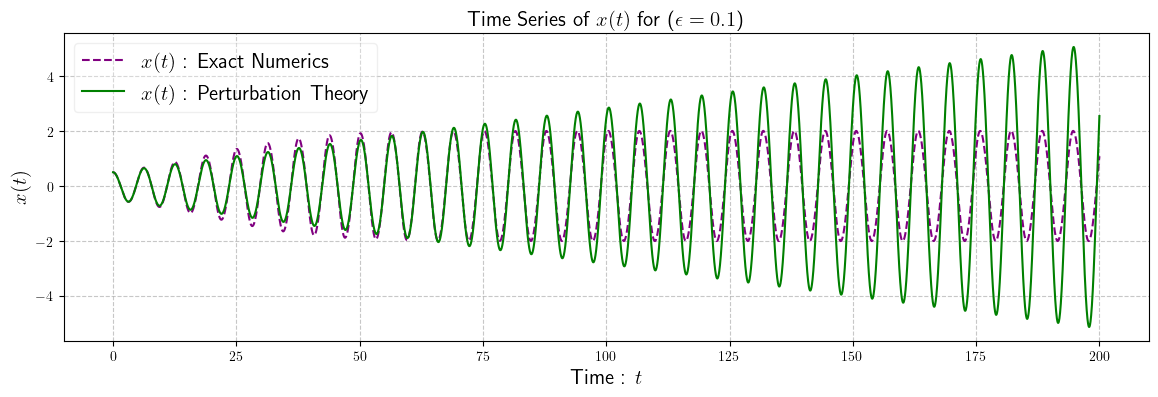

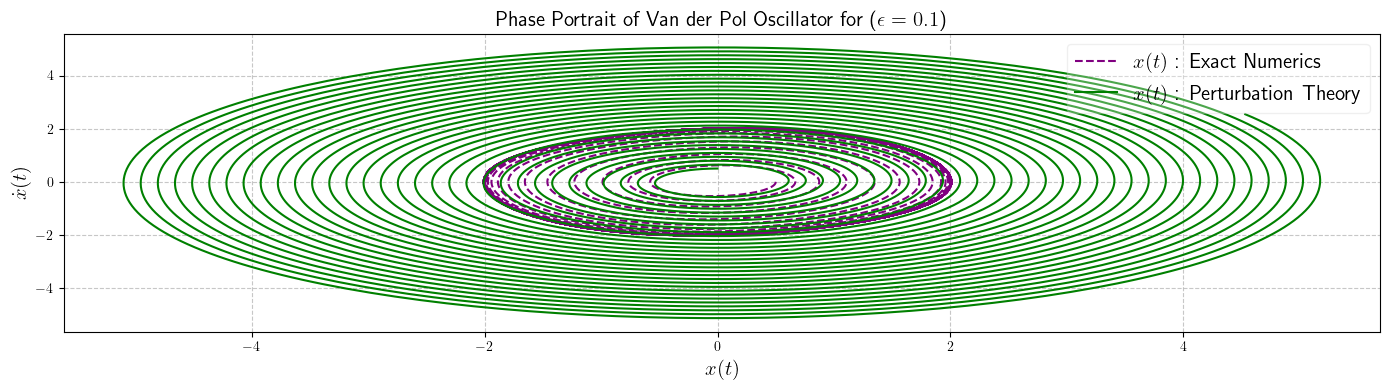

In [19]:
epsilon = 0.1                     ###############  epsilon value  ###############
t_span = (0.0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 8000)
initial_conditions = [0.5, 0.0]

Sol = solve_ivp(VandPol, t_span, initial_conditions, method = 'RK45', args=(epsilon,), t_eval=t_eval)         #### Solving the Differential Equation

plt.figure(figsize=(14, 4))
plt.plot(Sol.t, Sol.y[0], color = 'purple', linestyle = '--',  label='$x(t)$ : Exact Numerics')               #### x(t) vs t : Exact Numerics!
plt.plot(t_eval, VdP_pert(t_eval, epsilon), color = 'green', label='$x(t)$ : Perturbation Theory')            #### x(t) vs t : Perturbation Theory
plt.title(f"Time Series of $x(t)$  for ($\epsilon={epsilon}$)", fontsize = 15)
plt.xlabel('Time : $t$', fontsize = 15)
plt.ylabel('$x(t)$', fontsize = 15)
# plt.xticks(np.arange(0, 110, 10))
# plt.yticks(np.arange(-2, 2.5, 0.5))
plt.legend(framealpha=0.3, fontsize = 15)
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.figure(figsize=(14, 4))
plt.plot(Sol.y[0], Sol.y[1], color = 'purple', linestyle = '--',  label='$x(t)$ : Exact Numerics')             #### x(t) vs t : Exact Numerics!
################# x(t) vs t : Perturbation Theory #############
plt.plot(VdP_pertV(t_eval, epsilon), VdP_pert(t_eval, epsilon), color = 'green', label='$x(t)$ : Perturbation Theory')


plt.title(f"Phase Portrait of Van der Pol Oscillator for ($\epsilon={epsilon}$)", fontsize = 15)
plt.xlabel('$x(t)$', fontsize = 15)
plt.ylabel('$\dot{x}(t)$', fontsize = 15)
# plt.xticks(np.arange(0, 110, 10))
# plt.yticks(np.arange(-2, 2.5, 0.5))
plt.legend(framealpha=0.3, fontsize = 15)
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.tight_layout()
plt.show()

### Why is Perturbation not a good approximation for larger $t$ and $\epsilon$ in the Van der Pol System? 

There are actually **two dominant time scales** associated with this (rather these types of problems: $\ddot{x}+x+\epsilon f(x,\dot{x})=0$). 
1. Fast Time : $t \sim \mathcal{O}(1)$ , which is associated with the $\text{\textcolor{cyan}{sinusoidal oscillations}}$
2. Slow Time : $t \sim 1/\epsilon$ , which is associated with the $\text{\textcolor{magenta}{amplitude decay over time}}$

In fact, there are further sub-dominant Slow Time scales where, $\textcolor{red}{t \sim 1/\epsilon^2 \ , \ t \sim 1/\epsilon^3 \ , \ t \sim 1/\epsilon^4 \ , \ \cdot\cdot\cdot\cdot }$ which are concerned to frequency corrections and further amplitude corrections
<!-- 
$$ \frac{2}{\sqrt{1+r_0e^{-2\epsilon t}}} 
=\frac{2}{\sqrt{1+r_0}}\left[ 1+\frac{r_0}{1+r_0}\,\epsilon t 
+\left(-\frac{r_0}{1+r_0}+\frac{3r_0^2}{2(1+r_0)^2}\right)\epsilon^2t^2 + O(\epsilon^3) \right] $$ -->


## $\text{\textcolor{teal}{Multiple Scale Perturbation Theory}}$

### This is Motivated by the need to develop uniformly valid asymptotic approximations for systems that exhibit dynamics on multiple time scales:
<!-- 1. In standard perturbation methods, terms that grow with time (secular terms) can appear, eventually invalidating the expansion. The multiple scales method introduces additional time variables to absorb these growing terms, ensuring the solution remains valid for a long time.
 -->

The expansion goes as follows:
$$ x = x(T_0, T_1, T_2, T_3, \cdot\cdot\cdot, T_n,\cdot\cdot\cdot) = x(\textcolor{cyan}{t}, \textcolor{magenta}{\epsilon t}, \textcolor{red}{\epsilon^2 t, \epsilon^3 t, \cdot\cdot\cdot, \epsilon^n t\cdot\cdot\cdot}) \ \ \ \text{with } \ T_n = \epsilon^n t $$
$$ x(t, \epsilon) = x_0(t,T) + \epsilon x_1(t,T) + \epsilon^2 x_2(t,T) + \mathcal{O}(\epsilon^3) \ \ \ \text{with } T = \epsilon t $$
$$ \frac{d}{dt} = D_0 + \epsilon D_1 + \epsilon^2 D_2 + \epsilon^3 D_3 + \cdot\cdot\cdot \ \ \ \& \ \ \ \frac{d^2}{dt^2} = D_0^2 + 2\epsilon D_0 D_1 + \epsilon^2 (D_1^2+2D_0D_2) + \cdot\cdot\cdot $$
$$ D_0 = \frac{\partial }{\partial t} \  , \ D_1 = \frac{\partial }{\partial T} \ , \ \cdot\cdot\cdot \ , \ D_n = \frac{\partial^n }{\partial t^n}  $$
And now, instead of determining $x$ as a function of $t$, we determine $x$ as a function of $T_0, T_1, T_2, T_3, \cdot\cdot\cdot$

$$\mathcal{O}(1) \ : \ D_0^2 x_0 + x_0 = 0 \ \ \ : \ \ \text{SHM, with Initial Conditions - } ; x_0(0,0) = 0.5 \ \& \ D_0 x_0(0,0) = 0 $$
$$ \mathcal{O}(\epsilon) \ : \ D_0^2 x_1 + x_1 = -2D_0D_1 x_0 - (x_0^2-1)D_0 x_0  $$
**SOLUTIONS:**
$$ \mathcal{O}(1) \ : \ x_0(t,T) = A(T) \cos{t} + B(T) \sin{t} $$
$$ \mathcal{O}(\epsilon) \ : \ \text{(RHS) } = 2D_0D_1 x_0 + (x_0^2-1)D_0 x_0 = \bigg(\textcolor{red}{-2D_0A(T)-\frac{A^3(T)}{4} - \frac{A(T)B^2(T)}{4} + A(T)} \bigg) \sin{t} - \frac{1}{4} [A^3(T)-3A(T)B^2(T)] \sin{3t} \ \ \ \ \ $$
$$ {} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ {} + \bigg( \textcolor{red}{+2D_0B(T)+\frac{B^3(T)}{4} + \frac{B(T)A^2(T)}{4} - B(T)} \bigg) \cos{t} - \frac{1}{4} [B^3(T)-3A^2(T)B(T)] \cos{3t} $$

The $\text{\textcolor{red}{highlighted}}$ terms lead to secular growth, so these coefficients should be equal to zero. 

To do so, define : $\displaystyle \rho = A^2+B^2$ and then we have $\displaystyle  \frac{\partial \rho}{\partial T} + \frac{\rho^2}{4} - \rho = 0 $ , which upon solving we get,

$$  \rho(T) = \displaystyle \frac{4}{(1+15e^{-T})} \ \implies \ A(T) = \frac{2}{\sqrt{(1+15e^{-T})}} \ \ \& \ \ B(T) = 0  $$

$$ x(t) = \frac{2}{\sqrt{(1+15e^{-\epsilon t})}} \cos{t} + \mathcal{O}(\epsilon)   $$

## $\text{\textcolor{yellow}{Method of Averaging}}$

$\large{\text{The Ansatz for the \textcolor{yellow}{Method of Averaging} is motivated from the method of \textcolor{teal}{Multiple Scale Perturbation Theory}}}$

$\text{\large{The \textit{Van der Pol Oscillator} when we set $\epsilon=0$ is a Simple Harmonic Oscillator with unit frequency, and its solution is :}}$
\begin{equation}
\large{ x(t) = R \cos{(t+\phi_o)} \ \ \ \ \& \ \ \ \ \dot{x}(t) = -R \sin{(t+\phi_o)} }
\end{equation}
$\text{\large{So, a natural generalization of the unperturbed solution (only retaining the leading order) when $\epsilon\neq 0$ is : }}$
$$ \large{\textcolor{yellow}{x(t) = r(t) \cos{(t+\phi(t))}}} \ \ \ \ \ \& \ \ \ \ \ \large{\textcolor{yellow}{y(t) = \dot{x}(t) = - r(t) \sin{(t+\phi(t))} } } $$
$\large{\text{Similarly, upon  differentiating } x(t) \text{ and equating with } y(t) \text{ we get, } }$
<!-- $$ \large{ \dot{x}(t) = \dot{r}(t) \cos{(t+\phi(t))} - r(t) \sin{(t+\phi(t))} (1+\dot{\phi}(t)) = - r(t) \sin{(t+\phi(t))} }  $$ -->
$$ \large{ \implies \textcolor{cyan}{\dot{r}(t) \cos{(t+\phi(t))} - \dot{\phi}(t)r(t)\sin{(t+\phi(t))} =0}} \ \ \ \ \ \  \textcolor{cyan}{\cdot\cdot\cdot\cdot\cdot\cdot \ \ (1)} $$

$ \large{\text{Now, we want to evaluate } \dot{y} = -x + \epsilon(1-x^2)y  \text{ , and we get the following equation} } $

\begin{equation}
\large{ \textcolor{magenta}{ \dot{r}(t) \sin{(t+\phi(t))} + \dot{\phi}(t) r(t) \cos{(t+\phi(t))}  = \epsilon r(t) \sin{(t+\phi(t))} (1-r^2(t) \cos^2{(t+\phi(t))}) } \ \ \ \ \ \ \ \textcolor{magenta}{\cdot\cdot\cdot\cdot\cdot\cdot \ \ (2)}  }
\end{equation}

$\large{ \text{upon solving these pair of equations \textcolor{cyan}{(1)} \& \textcolor{magenta}{(2)} in } \dot{r}(t) \ \& \ \dot{\phi}(t) \text{ we get,} }$

$$ \large{ \dot{\phi}(t) = 0 \ \ \& \ \ \dot{r}(t) = \epsilon r(t)\bigg(1-\frac{r^2(t)}{4}\bigg) } $$
$ \large{\text{Further simplifying, it yields, }} $
$$ \large{\phi(t) = \phi_o \ \ \ \& \ \ \  r(t) = \frac{2}{\sqrt{ 1 + r_o e^{-2\epsilon t}  }} \ \ \text{ where } \phi_o \ \& \ r_o \text{ are constants} }  $$
$\large{\text{Therefore, using the method of averaging, the general solution for the Van der Pol Oscillator is, }}$

$$ \large{ x(t) = r(t) \cos(t+\phi(t)) = \frac{2}{\sqrt{ 1 + r_o e^{-2\epsilon t}  }} \cos(t+\phi_o) } $$

#### Now the numerics! (for method of averaging)

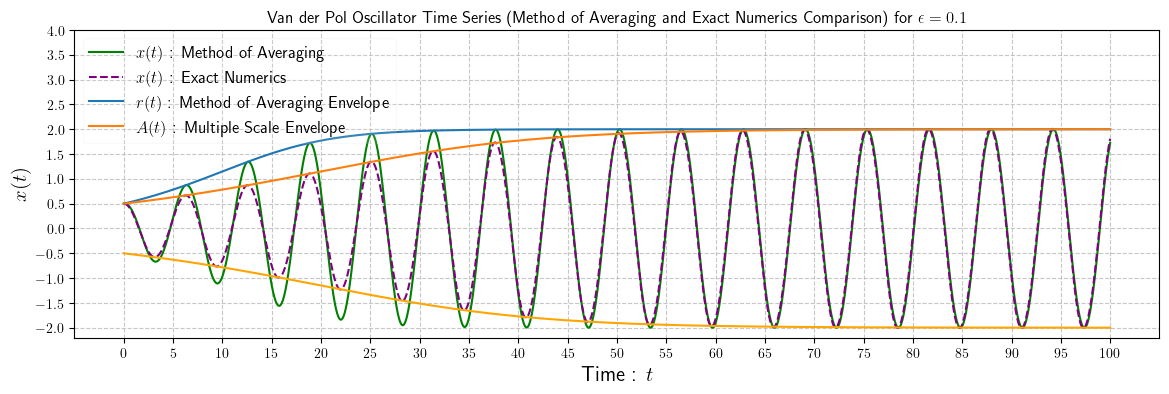

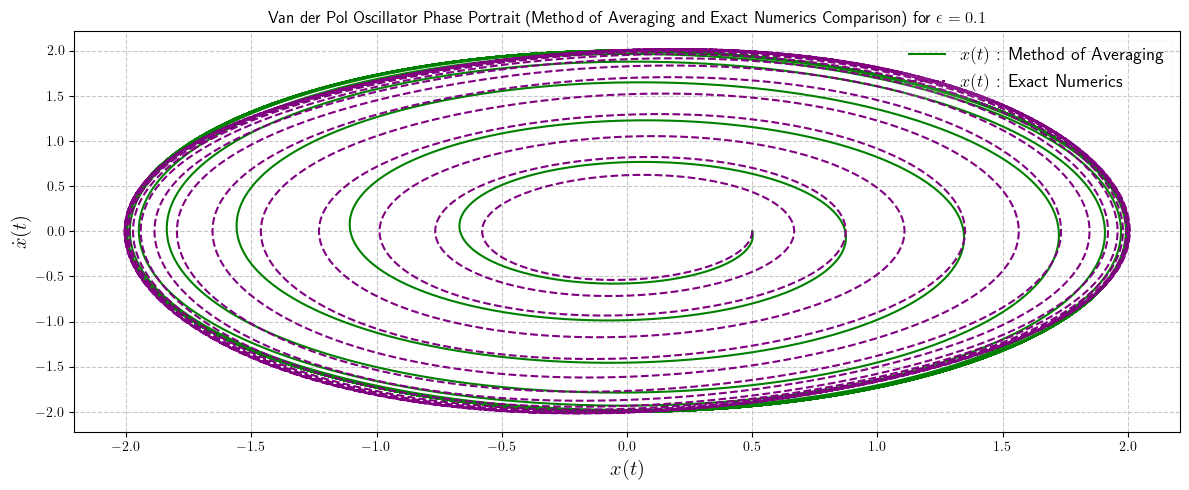

In [24]:
###########################################################################################################################
########################### Function defined for the result we got from Method of Averaging! ##############################
###########################################################################################################################

def x_t(t, r0, epsilon, phi0):
    return (2 / np.sqrt(1 + r0 * np.exp(-2 * epsilon * t))) * np.cos(t + phi0)
    
def v_t(t, r0, epsilon, phi0):
    return (-2 / np.sqrt(1 + r0 * np.exp(-2 * epsilon * t))) * np.sin(t + phi0)

def Envelope(t, r0, epsilon):
    return (2 / np.sqrt(1 + r0 * np.exp(-2 * epsilon * t)))

def Env_multi(t, epsilon, alpha):
    return ((2 * alpha) / np.sqrt(alpha**2 + (4 - alpha**2) * np.exp(-1 * epsilon * t)))

def x_t_multi(t, epsilon, alpha):
    r = ((2 * alpha) / np.sqrt(alpha**2 + (4 - alpha**2) * np.exp(-1 * epsilon * t)))
    return r * np.cos(t)

# def v_t_multi(t, epsilon, alpha):
#     r = ((2 * alpha) / np.sqrt(alpha**2 + (4 - alpha**2) * np.exp(-1 * epsilon * t)))
#     return r * np.cos(t)
###########################################################################################################################
############################################ Parameters List ##############################################################
###########################################################################################################################

r0 = 15                                              ## Initial amplitude (x(0) = 0.5) => r_0 = 15 produces 0.5)
Epsilon = 0.1                                        ## Small damping/growth factor (Method of averaging used for small epsilon limit)
phi0 = 0                                             ## Initial phase : ϕ_o = 0
initial_conditions = [0.5, 0.0]                      ## Initial Condition : [x(0), x'(0)]
alpha = 0.5                                          ## Initial Condition for the Multiple Scales

t_span = (0, 100)                                    ## Time Stretch
t_eval = np.linspace(t_span[0], t_span[1], 8000)     ## Time Array

###########################################################################################################################
##################################### Compute x(t), dx(t)/dt using two techniques! ########################################
###########################################################################################################################

x_values = x_t(t_eval, r0, Epsilon, phi0)                                                     ## x(t) : Method of Averaging
v_values = v_t(t_eval, r0, Epsilon, phi0)                                     ## v(t) : Method of Averaging  [v(t) = dx/dt]


Sol = solve_ivp(VandPol, t_span, initial_conditions, method = 'RK45', args=(Epsilon,), t_eval=t_eval)     ## Exact Numerics

env = []
env_multi = []
for t in t_eval:
    env.append(Envelope(t, r0, epsilon))                                             ## r(t) : Method of Averaging Envelope
    env_multi.append(Env_multi(t, epsilon, alpha))                             ## A(t) : Method of Multiple Scales Envelope


###########################################################################################################################
############################## Plot 1. (Time Series) Method of Averaging and Exact Numerics ###############################
###########################################################################################################################

plt.figure(figsize=(14, 4))
plt.plot(t_eval, x_values, color = 'green', label='$x(t)$ : Method of Averaging')
plt.plot(Sol.t, Sol.y[0], color = 'purple', linestyle = '--', label='$x(t)$ : Exact Numerics')
plt.plot(t_eval, np.array(env), label='$r(t)$ : Method of Averaging Envelope')
plt.plot(t_eval, np.array(env_multi), label='$A(t)$ : Multiple Scale Envelope')
plt.plot(t_eval, -np.array(env_multi), color = 'orange')
# plt.plot(Sol.t, Sol.y[0]-x_values, label = 'error')                                                     ##### ERROR PLOTS
plt.xlabel("Time : $t$", fontsize = 15)
plt.ylabel("$x(t)$", fontsize = 15)
plt.yticks(np.arange(-2, 4.5, 0.5))
plt.xticks(np.arange(0, 105, 5))
plt.title(f"Van der Pol Oscillator Time Series (Method of Averaging and Exact Numerics Comparison) for $\epsilon = {Epsilon}$")
plt.legend(framealpha=0.1, fontsize = 12)
plt.grid(True, linestyle = "--", alpha = 0.7)

###########################################################################################################################
############################# Plot 2. (Phase Portrait) Method of Averaging and Exact Numerics #############################
###########################################################################################################################

plt.figure(figsize=(12, 5))
plt.plot(x_values, v_values, color = 'green', label='$x(t)$ : Method of Averaging')
plt.plot(Sol.y[0], Sol.y[1], color = 'purple', linestyle = '--', label='$x(t)$ : Exact Numerics')
# plt.plot(Sol.y[0]-x_values, Sol.y[1]-v_values, label = 'Error')                                       ##### ERROR PLOTS
plt.xlabel("$x(t)$", fontsize = 15)
plt.ylabel("$\dot{x}(t)$", fontsize = 15)
# plt.yticks(np.arange(-2, 3.5, 0.5))
# plt.xticks(np.arange(0, 105, 5))
plt.title(f"Van der Pol Oscillator Phase Portrait (Method of Averaging and Exact Numerics Comparison) for $\epsilon = {Epsilon}$")
plt.legend(framealpha=0.1, fontsize = 13, loc = 'upper right')
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.tight_layout()
plt.show()

$\large{\text{We can see the envelope obtained from the method of multiple scales gives a better approximation! However, we will see}}$ $\large{\text{ in the numerics, there is still some inconsistency, but if we take higher and higher orders of $\epsilon$ into consideration, we can}}$ $\large{\text{obtain a better approximation}}$


## Understanding the Limits of $\textcolor{red}{\epsilon}$ for the Van der Pol Oscillator!
$\large{\text{\textbf{Q1.} How small is small (for the value of \textcolor{red}{$\epsilon$})? } }$ it is said $\epsilon \ll 1$

$\large{\text{\textbf{Q2.} How large is large (for the value of \textcolor{red}{$\epsilon$})? } }$ it is said $\epsilon \gg 1$

Can we get something from the numerics? By comparing different approximate techniques' results with the exact numerics!!

In [26]:
EPS = np.linspace(0, 0.3, 501)                 ## ɛ : Epsilon Array
t_span = (0, 400)
t_eval = np.linspace(t_span[0], t_span[1], 8000)
Res1 = []
Res2 = []
Res3 = []
for eps in EPS:
    Sol = solve_ivp(VandPol, t_span, initial_conditions, method = 'RK45', args=(eps,), t_eval=t_eval)  ## x(t) : Exact Numerics
    Res1.append(Sol.y[0])
    x_values = x_t(t_eval, r0, eps, phi0)                                                              ## x(t) : Method of Averaging
    Res2.append(x_values)
    x_multival = x_t_multi(t_eval, eps, alpha)
    Res3.append(x_multival)

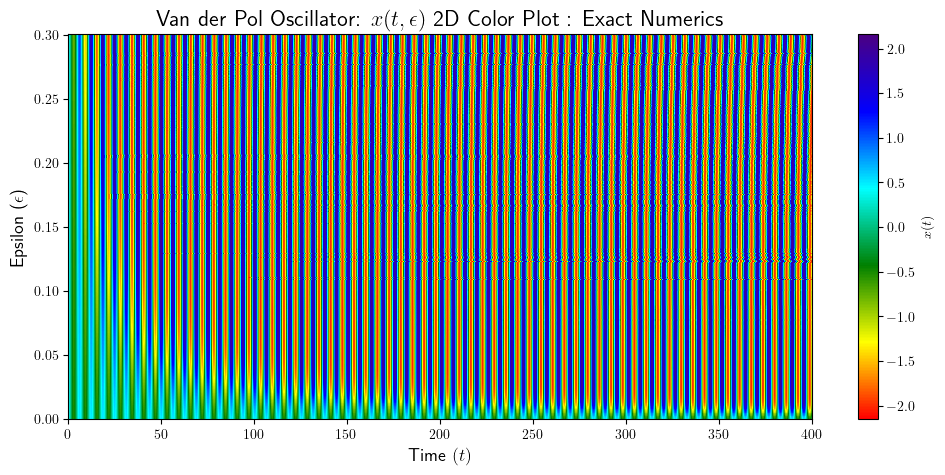

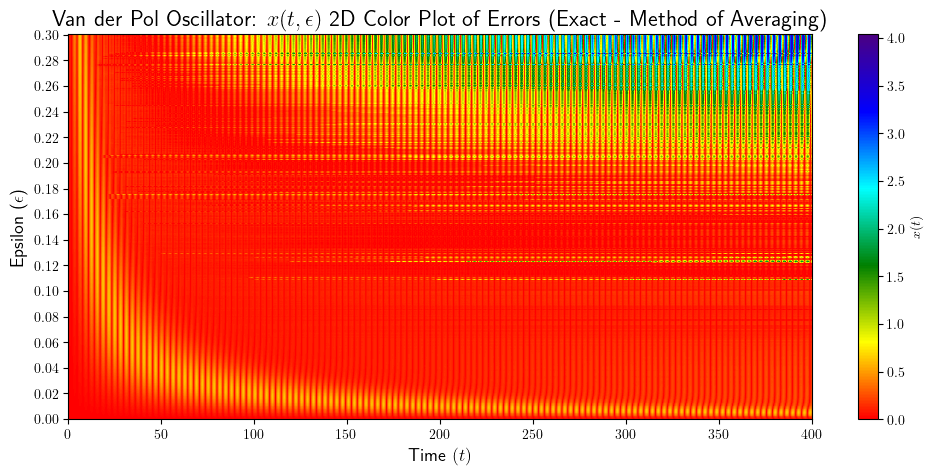

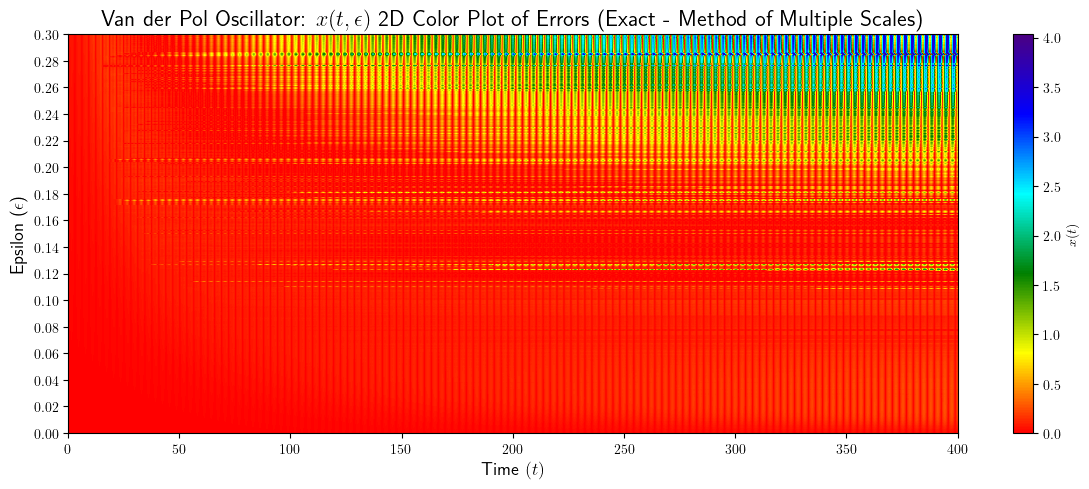

In [27]:
###########################################################################################################################
###################################### Convert list to NumPy array for plotting ###########################################
###########################################################################################################################

Res = np.abs(np.array(Res1)-np.array(Res2))                                   ############  2D Error Plot (as a color plot)
Res1 = np.array(Res1)                                                         ############  2D Color Plot
Res_mul = np.abs(np.array(Res1)-np.array(Res3))                               ############ 2D Error Plot (multiple scales)

Res_nor = np.array(Res1)-np.array(Res2)
Res_mul_nor = np.array(Res1)-np.array(Res3)

colors = ["red", "yellow", "green", "cyan", "blue", "indigo"]
custom_cmap = LinearSegmentedColormap.from_list("my_cmap", colors, N=256)

##################################################### PLOT 1 ###############################################################
plt.figure(figsize=(12, 5))
#### Create the heatmap ##########
plt.pcolormesh(t_eval, EPS, Res1, shading='auto', cmap=custom_cmap)      ########## 2D Color plot of x(t,ɛ) : Exact Numerics
#### Labels and Title ############
plt.xlabel("Time $(t)$", fontsize = 13)
plt.ylabel("Epsilon ($\epsilon$)", fontsize = 13)
plt.title("Van der Pol Oscillator: $x(t,\epsilon)$ 2D Color Plot : Exact Numerics", fontsize = 16)
plt.colorbar(label="$x(t)$")

##################################################### PLOT 2 ###############################################################
plt.figure(figsize=(12, 5))
#### Create the heatmap #########
plt.pcolormesh(t_eval, EPS, Res, shading='auto', cmap=custom_cmap)                ########## 2D Color (ERROR) plot of x(t,ɛ)
# plt.pcolormesh(t_eval, EPS, Res_nor, shading='auto', cmap=custom_cmap)                ########## 2D Color (ERROR) plot of x(t,ɛ)
#### Labels and Title ###########
plt.xlabel("Time $(t)$", fontsize = 13)
plt.yticks(np.arange(0, 0.32, 0.02))
plt.ylabel("Epsilon ($\epsilon$)", fontsize = 13)
plt.title("Van der Pol Oscillator: $x(t,\epsilon)$ 2D Color Plot of Errors (Exact - Method of Averaging)", fontsize = 16)
plt.colorbar(label="$x(t)$")

##################################################### PLOT 3 ###############################################################
plt.figure(figsize=(12, 5))
#### Create the heatmap #########
plt.pcolormesh(t_eval, EPS, Res_mul, shading='auto', cmap=custom_cmap)                ########## 2D Color (ERROR) plot of x(t,ɛ)
# plt.pcolormesh(t_eval, EPS, Res_mul_nor, shading='auto', cmap=custom_cmap)                ########## 2D Color (ERROR) plot of x(t,ɛ)
#### Labels and Title ###########
plt.xlabel("Time $(t)$", fontsize = 13)
plt.yticks(np.arange(0, 0.32, 0.02))
plt.ylabel("Epsilon ($\epsilon$)", fontsize = 13)
plt.title("Van der Pol Oscillator: $x(t,\epsilon)$ 2D Color Plot of Errors (Exact - Method of  Multiple Scales)", fontsize = 16)
plt.colorbar(label="$x(t)$")

######################################################## Show plot ########################################################
plt.tight_layout()
plt.show()

$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ \text{\Huge{Thank You!}} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$

# REFERENCES

$\textbf{[1]}$ $\textcolor{white}{\text{Ali H. Nayfeh, }} \href{https://www.amazon.in/Introduction-Perturbation-Techniques-Classics-Library/dp/0471310131}{\texttt{Introduction to perturbation techniques. John Wiley \& Sons, (1993)}}$

$\textbf{[2]}$ $\textcolor{white}{\text{Jeff Moehlis et al., }} \href{http://www.scholarpedia.org/article/Periodic_orbit}{\texttt{Periodic orbit, Scholarpedia, 1(7):1358 (2006)}}$

$\textbf{[3]}$ $\textcolor{white}{\text{Takashi Kanamaru, }} \href{http://www.scholarpedia.org/article/Van_der_Pol_oscillator}{\texttt{Van der Pol Oscillator, Scholarpedia, 2(1):2202, (2007)}}$

$\textbf{[4]}$ $\textcolor{white}{\text{Ferdinand Verhulst, }} \href{https://doi.org/10.1007/978-3-642-61453-8}{\texttt{Nonlinear Differential Equations and Dynamical Systems, Springer Berlin, Heidelberg, (2012)}}.$

$\textbf{[5]}$ $\textcolor{white}{\text{Steven Strogatz, }} \href{https://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering}{\texttt{Nonlinear Dynamics and Chaos, Chapman \& Hall, CRC Press, (2015)}}.$

$\textbf{[6]}$ $\href{https://en.wikipedia.org/wiki/Phase_portrait}{\texttt{Phase Portrait, Wikipedia}}$

$\textbf{[7]}$ $\textcolor{white}{\text{Manoj Kumar, Parul Varshney, }} \href{https://doi.org/10.1007/s40010-019-00655-y}{\texttt{Proc. Natl. Acad. Sci., India, Sect. A Phys. Sci. 91, 55–65 (2021)}}.$

$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ \text{\Huge{Backup Slides}} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$
$$ {}{} $$

### Poincaré−Bendixson Theorem
With the Conditions (holding true),
1. $\mathcal{R}$ is a closed, bounded subset of the plane,
2. $\dot{\mathbf{x}} = f(\mathbf{x})$ is a continuously differentiable vector field on an open set containing $\mathcal{R}$,
3. $\mathcal{R}$ does not contain any fixed points, and
4. There exists a trajectory $\mathcal{C}$ that is “confined” in $\mathcal{R}$, in the sense that it starts in $\mathcal{R}$ and stays in $\mathcal{R}$ for all future time
   
<img src="poincarebend1.png" alt="My Image" width="500"/>

Then, either $\mathcal{C}$  is a closed orbit, or it spirals toward a closed orbit as $t \to \infty$. In either case, $\mathcal{R}$  contains a closed orbit.

$\large{\text{\textcolor{red}{Note.: This result depends crucially on the two-dimensionality of the plane. In higher-dimensional systems ($n \geq 3$), }}}$ $\large{\text{\textcolor{red}{the Poincaré-Bendixson theorem no longer applies}}}$


In [32]:
# Define parameters
epsilon = 0.1   # Nonlinearity parameter
F = 1.0         # Forcing amplitude
Omega = 1.0     # Forcing frequency
theta0 = 0.1    # Forcing phase

# Define the ODE system as a first-order system.
# Let y[0] = x and y[1] = x_dot. Then the system becomes:
#   dx/dt = x_dot
#   d(x_dot)/dt = epsilon * (1 - x^2) * x_dot - x + F * cos(Omega*t + theta0)
def van_der_pol_forced(t, y):
    x, x_dot = y
    dxdt = x_dot
    dxdotdt = epsilon * (1 - x**2) * x_dot - x + F * np.cos(Omega * t + theta0)
    return [dxdt, dxdotdt]

# Set initial conditions: x(0) and x_dot(0)
y0 = [0.0, 0.0]

# Define the time span for the simulation
t_start = 0.0
t_end = 200.0
t_eval = np.linspace(t_start, t_end, 5000)

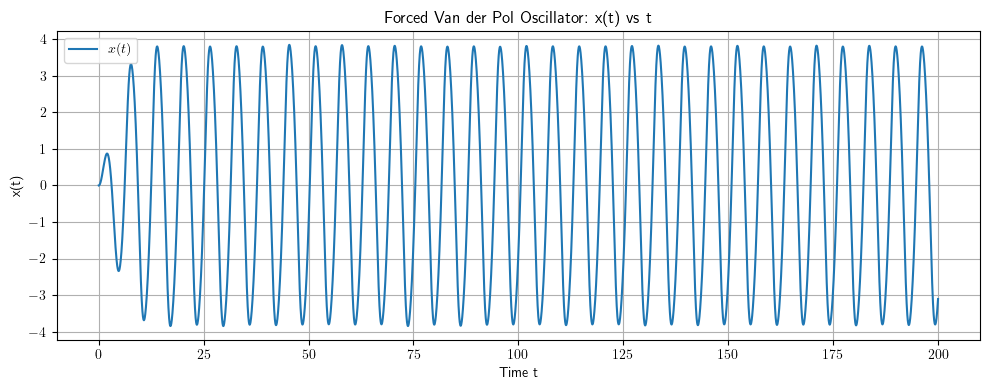

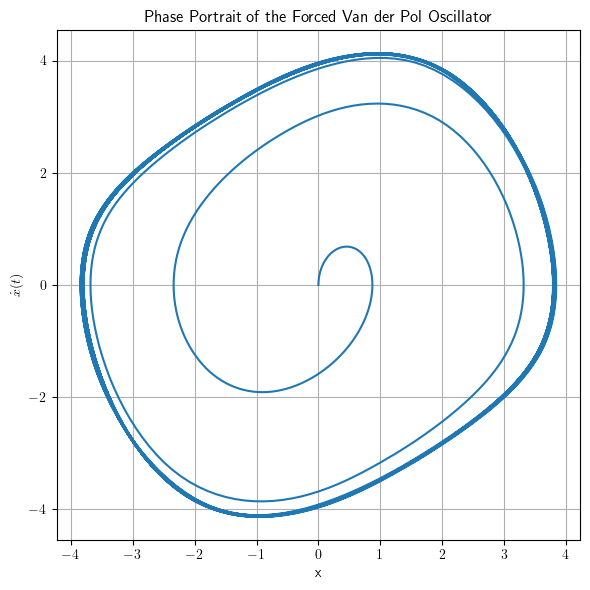

In [33]:
# Solve the ODE using solve_ivp
sol = solve_ivp(van_der_pol_forced, [t_start, t_end], y0, t_eval=t_eval, method='RK45')

# Plot the time series x(t)
plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0], label=r'$x(t)$')
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.title('Forced Van der Pol Oscillator: x(t) vs t')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Plot the phase space: x vs x_dot
plt.figure(figsize=(6, 6))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x')
plt.ylabel(r'$\dot{x}(t)$')
plt.title('Phase Portrait of the Forced Van der Pol Oscillator')
plt.grid(True)
plt.tight_layout()

plt.show()

In [34]:
##########################################################################################################################
########### Function Definition for the Differential Equation of the New Van der Pol Oscillator! #########################
##########################################################################################################################
def Modu_VandPol(t, z, epsi_0, delta, omega_m):
    """
    Periodic modulation of the nonlinearity parameter ɛ:
        ɛ = ɛ(t) = ɛ_0 + ẟ cos(ω_m t)
    Modified Van der Pol Oscillator with ɛ(t)
        y = x'
        y' = [ɛ_0 + ẟ cos(ω_m t)] (1 - x^2) x' + x
    """
    x, y = z
    dxdt = y
    dydt = (epsi_0 + delta * np.cos(omega_m * t)) * (1 - x**2)*y - x 
    return [dxdt, dydt]

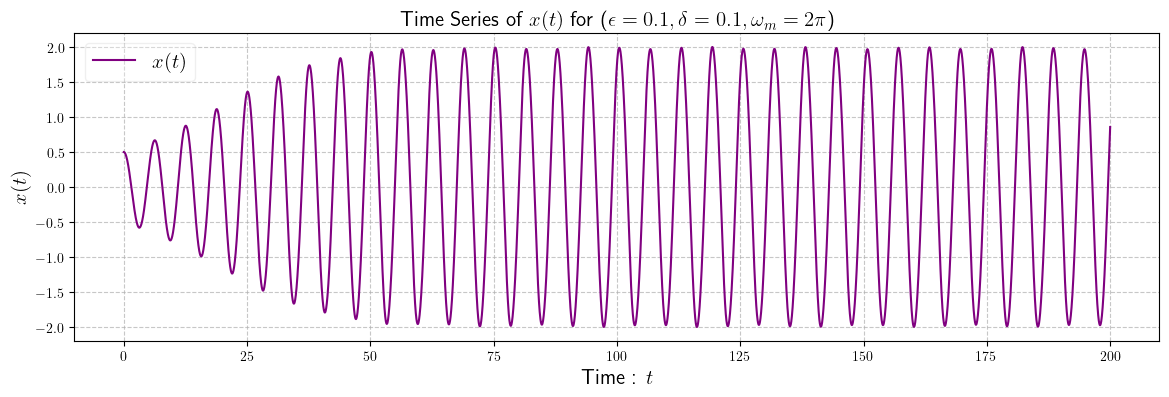

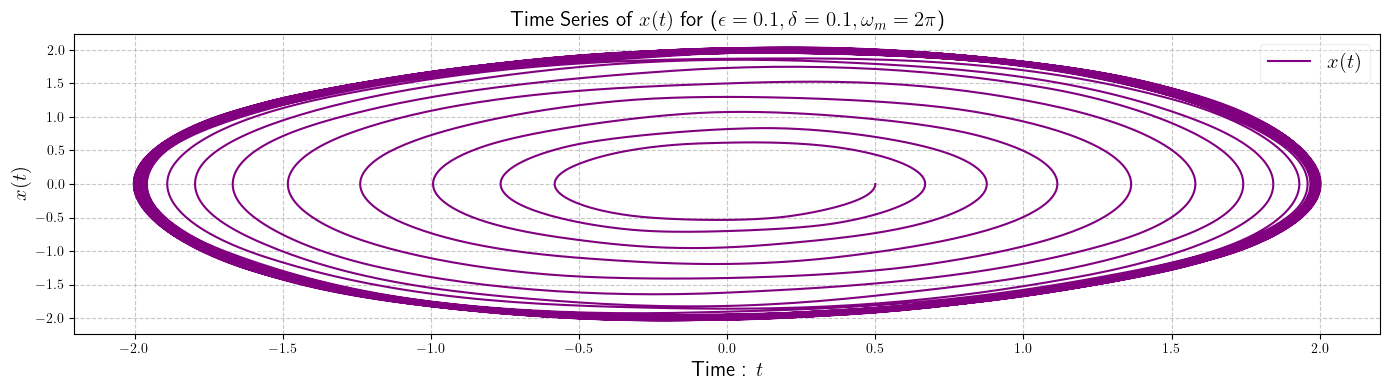

In [35]:
################ PARAMETERS ######################
epsi_0 = 0.1
delta = 0.1
omega_m = 2*np.pi

t_span_mod = (0.0, 200)
t_eval_mod = np.linspace(t_span_mod[0], t_span_mod[1], 8000)

init_cond_mod = [0.5, 0]

################ Solving the Differential Equation #######################
Sol_mod = solve_ivp(Modu_VandPol, t_span_mod, init_cond_mod, method = 'RK45', args=(epsi_0, delta, omega_m,), t_eval=t_eval_mod) 


###########################################################################################################################
####################################################### PLOT 1: Time Series ###############################################
###########################################################################################################################

plt.figure(figsize=(14, 4))
plt.plot(Sol_mod.t, Sol_mod.y[0], color = 'purple', label='$x(t)$')                                    #### Time Series : x(t) vs t
# plt.plot(Sol.t, Sol.y[1], color = 'green', label='$\dot{x}(t)$'                            #### Time Series :  x'(t) vs t
# plt.plot(Sol.t, y_dot_vals, color = 'blue', label='$\ddot{x}(t)$')                        #### Time Series :  x''(t) vs t
plt.title(f"Time Series of $x(t)$  for ($\epsilon={epsi_0}, \delta={delta}, \omega_m=2\pi$)", fontsize = 15)
plt.xlabel('Time : $t$', fontsize = 15)
plt.ylabel('$x(t)$', fontsize = 15)
# plt.xticks(np.arange(0, 110, 10))
# plt.yticks(np.arange(-2, 2.5, 0.5))
plt.legend(framealpha=0.3, fontsize = 15)
plt.grid(True, linestyle = "--", alpha = 0.7)

###########################################################################################################################
####################################################### PLOT 1: Time Series ###############################################
###########################################################################################################################

plt.figure(figsize=(14, 4))
plt.plot(Sol_mod.y[0], Sol_mod.y[1], color = 'purple', label='$x(t)$')                                    #### Time Series : x(t) vs t
# plt.plot(Sol.t, Sol.y[1], color = 'green', label='$\dot{x}(t)$'                            #### Time Series :  x'(t) vs t
# plt.plot(Sol.t, y_dot_vals, color = 'blue', label='$\ddot{x}(t)$')                        #### Time Series :  x''(t) vs t
plt.title(f"Time Series of $x(t)$  for ($\epsilon={epsi_0}, \delta={delta}, \omega_m=2\pi$)", fontsize = 15)
plt.xlabel('Time : $t$', fontsize = 15)
plt.ylabel('$x(t)$', fontsize = 15)
# plt.xticks(np.arange(0, 110, 10))
# plt.yticks(np.arange(-2, 2.5, 0.5))
plt.legend(framealpha=0.3, fontsize = 15)
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.tight_layout()
plt.show()

In [36]:
def phase_modu(epsi_0, delta, omega_m, t):
    return epsi_0 * (1 + (delta/epsi_0) * np.cos(omega_m * t))

# Parameters
epsi_0 = 1
omega_m = 2 * np.pi
t = np.linspace(0, 1, 1000)
delta = np.linspace(0, 2, 1000)
delbye = delta / epsi_0
X, Y = np.meshgrid(t, delbye)

# Compute the phase_modu values
ph = np.zeros((len(t), len(delbye)))
for k1, ti in enumerate(t):
    for k2, dj in enumerate(delbye):
        ph[k1, k2] = phase_modu(epsi_0, dj * epsi_0, omega_m, ti)

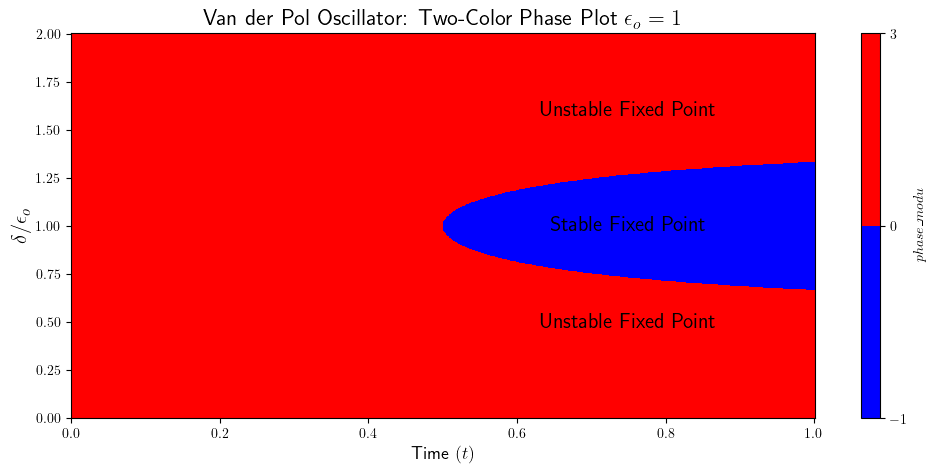

In [37]:
# Create a discrete colormap with two colors: blue for phase_modu < 0, red for phase_modu > 0.
colors = ["blue", "red"]
cmap = ListedColormap(colors)
# We set boundaries so that any value below 0 gets mapped to the first color,
# and values equal to or above 0 get mapped to the second color.
bounds = [ph.min(), 0, ph.max()]
norm = BoundaryNorm(bounds, cmap.N)

# Plotting the two-color map with a sharp boundary at 0
plt.figure(figsize=(12, 5))
plt.pcolormesh(X, Y, ph, shading='auto', cmap=cmap, norm=norm)
plt.xlabel("Time $(t)$", fontsize=13)
plt.ylabel("${\delta}/{\epsilon_o}$", fontsize=15)
plt.title(f"Van der Pol Oscillator: Two-Color Phase Plot $\epsilon_o ={epsi_0}$", fontsize=16)
plt.colorbar(label="$phase\_modu$")

plt.text(0.75, delbye.max()/2, "Stable Fixed Point", color="black", fontsize=15, ha="center", va="center")
# plt.text(9.5, 1.5, "Stable Fixed Point", color="black", fontsize=15, ha="center", va="center")
# Choose coordinates where ph is positive: For instance, at t=0.1 and x=1.5,
# At t=0.1, cos(0.2*pi) is positive so phase_modu > 0.
plt.text(0.75, 0.5, "Unstable Fixed Point", color="black", fontsize=15, ha="center", va="center")
plt.text(0.75, 0.8*delbye.max(), "Unstable Fixed Point", color="black", fontsize=15, ha="center", va="center")
# plt.text(9.5, 1.85, "Stable Limit Cycle", color="black", fontsize=15, ha="center", va="center")
plt.show()

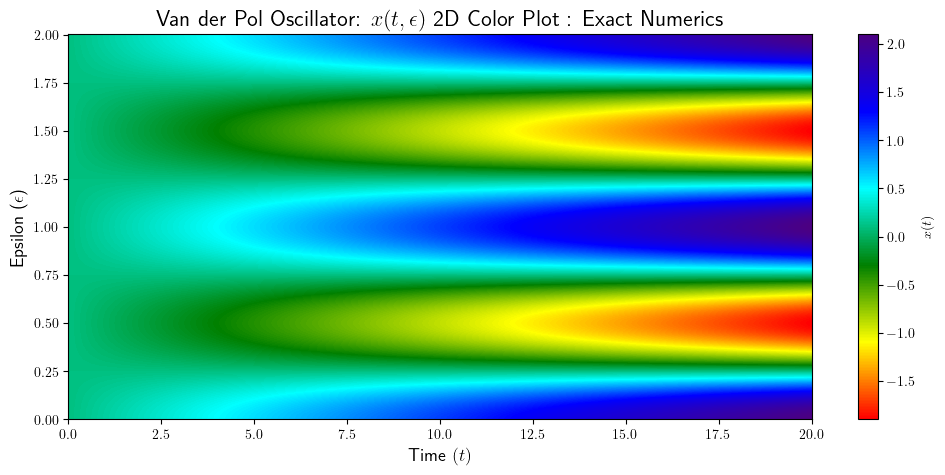

In [38]:
# Define the function
def phase_modu(epsi_0, delta, omega_m, t):
    return epsi_0 * (1 + (delta/epsi_0) * np.cos(omega_m * t))

# Parameters and grid definition
epsi_0 = 0.1
omega_m = 2 * np.pi
t = np.linspace(0, 2, 2000)
delta = np.linspace(0, 2, 2000)
delbye = delta / epsi_0
X, Y = np.meshgrid(delbye, t)

# Precompute the phase modulation values
ph = np.zeros((len(t), len(delbye)))
for k1, ti in enumerate(t):
    for k2, dj in enumerate(delbye):
        ph[k1, k2] = phase_modu(epsi_0, dj * epsi_0, omega_m, ti)

# Create custom colormap
colors = ["red", "yellow", "green", "cyan", "blue", "indigo"]
custom_cmap = LinearSegmentedColormap.from_list("my_cmap", colors, N=256)

# Plotting
plt.figure(figsize=(12, 5))
plt.pcolormesh(X, Y, ph, shading='auto', cmap=custom_cmap)
plt.xlabel("Time $(t)$", fontsize=13)
plt.ylabel("Epsilon ($\epsilon$)", fontsize=13)
plt.title("Van der Pol Oscillator: $x(t,\\epsilon)$ 2D Color Plot : Exact Numerics", fontsize=16)
plt.colorbar(label="$x(t)$")
plt.show()

## Runge–Kutta method (`RK4`)!!

$\text{\large{If we are given an \textbf{Initial Value Problem} of the following form :}}$
$$ \large{ \frac{dy}{dt} = F(t, y) \ \ ; \ \ \text{ with inital value } \ \ y(t_o) = y_o }$$
$\text{\large{The main job is to approximate the value of $y$ which is an unkown function (scalar or vector) of time $t$. Now what the \textbf{RK4} Method}}$ 
$\text{\large{does is the folowing :}}$

$$ \large{ y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4) \ \ \ ; \ \ \ t_{n+1} = t_n + h  } $$
$\text{\large{Where for $n=0,1,2,\cdot\cdot\cdot$}}$
$$ k_1 = F(t_n,y_n) \ \ ; \ \ k_2 = F\bigg(t_n+\frac{h}{2}, y_n+h\frac{k_1}{2}\bigg) \ \ ; \ \ k_3 = F\bigg(t_n +\frac{h}{2}, y_n+h\frac{k_2}{2} \bigg) \ \ ; \ \ k_4 = F\bigg(t_n+h,y_n+hk_3  \bigg) $$

$\text{\large{Therefore, $y_{n+1}$ is the \textbf{RK4} approximation of $y(t_{n+1})$ and the next value $({\displaystyle y_{n+1}})$ is determined by the present value $({\displaystyle y_{n}})$ plus the}}$ $\text{\large{weighted average of four increments, where each increment is the product of the size of the interval, $h$, and an estimated slope}}$ $\text{\large{specified by function $F$ on the right-hand side of the differential equation. }}$

In [40]:
# ##### Parameters Required for Evaluating the Differential Equation
# epsilon = 0.1                                   ## Initialize the value of epsilon! (to reproduce the plots in Fig.2 take ɛ=0.1 and for Fig.4 take ɛ=10)
# t_span = (0, 100)                               ## Starting Time, Ending Time
# initial_Conditions = [0.5, 0.0]                 ## initial_conditions = [x(0), y(0)=x'(0)]

# ##### Create a time array for evaluation
# t_eval = np.linspace(t_span[0], t_span[1], 4000)    ### Equispaced Time-intervals between Starting and Ending time

# ##### Solve the ODE (Initial Value Problem)
# Solution = solve_ivp(fun = VandPol,
#            t_span = t_span, 
#            y0 = initial_Conditions,
#            method = 'RK45',                         ### Other (Numerical) Integration Method(s) : RK23, DOP853, etc... 
#            args = (epsilon,),
#            t_eval = t_eval)

# ##### Extract the solution
# t_vals = Solution.t                                 ### Extract the Time values
# x_vals = Solution.y[0]                              ### Extract the Main Solution i.e., x(t)
# y_vals = Solution.y[1]                              ### Extract the Time Derivative of x(t) i.e., y(t)

# # Compute second derivative/acceleration [x''(t) or, y'(t)]
# y_dot_vals = epsilon * (1 - x_vals**2) * y_vals - x_vals

In [41]:
# ###### Plot the result [For x(t) vs t] ######
# plt.figure(figsize=(12, 4))
# plt.plot(t_vals, x_vals, color = 'purple', label=r"$x(t)$")
# plt.plot(t_vals, y_vals, linestyle = '--', color = 'green', label=r"$\dot{x}(t)$")
# plt.title(f"Van der Pol Oscillator ($\epsilon={epsilon}$)", fontsize = 20)
# plt.xlabel(r"Time : $t$", fontsize = 20)
# plt.ylabel(r"$x(t)$", fontsize = 20)
# plt.xticks(np.arange(0, 105, 5))
# # plt.xticks(np.arange(0, 35, np.pi))
# plt.yticks(np.arange(-2.5, 3, 0.5))
# plt.legend(fontsize = 14)
# plt.grid(True, linestyle = "--", alpha = 0.5)
# plt.tight_layout()
# plt.show()